In [236]:
import pandas as pd
import numpy as np
import pickle as pkl
import math

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import layers
from tensorflow.keras.layers import Resizing


import tensorflow as tf
from tqdm.notebook import tqdm

import gradio as gr




In [237]:
df = pd.read_csv('captions.txt')

In [238]:
def preprocess_text(text):
    text = 'startseq ' + text + ' endseq'
    return text

In [239]:
df['caption'] = df['caption'].apply(preprocess_text)

In [240]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['caption'])

In [241]:
vocab_size = len(tokenizer.word_index) + 1

In [242]:
max(len(i) for i in tokenizer.texts_to_sequences(df['caption']))

39

In [243]:
df = df.groupby('image',as_index=False).aggregate({'caption':list})

In [244]:
df

,image,caption
0,1000268201_693b08cb0e.jpg,[startseq A child in a pink dress is climbing ...
1,1001773457_577c3a7d70.jpg,[startseq A black dog and a spotted dog are fi...
2,1002674143_1b742ab4b8.jpg,[startseq A little girl covered in paint sits ...
3,1003163366_44323f5815.jpg,[startseq A man lays on a bench while his dog ...
4,1007129816_e794419615.jpg,[startseq A man in an orange hat starring at s...
...,...,...
8086,990890291_afc72be141.jpg,[startseq A man does a wheelie on his bicycle ...
8087,99171998_7cc800ceef.jpg,[startseq A group is sitting around a snowy cr...
8088,99679241_adc853a5c0.jpg,[startseq A grey bird stands majestically on a...
8089,997338199_7343367d7f.jpg,[startseq A person stands near golden walls . ...


In [245]:
# img_captions = df.set_index('image').to_dict()['caption']

# img_captions

In [246]:
df.head()

,image,caption
0,1000268201_693b08cb0e.jpg,[startseq A child in a pink dress is climbing ...
1,1001773457_577c3a7d70.jpg,[startseq A black dog and a spotted dog are fi...
2,1002674143_1b742ab4b8.jpg,[startseq A little girl covered in paint sits ...
3,1003163366_44323f5815.jpg,[startseq A man lays on a bench while his dog ...
4,1007129816_e794419615.jpg,[startseq A man in an orange hat starring at s...


In [247]:
df['caption']

0       [startseq A child in a pink dress is climbing ...
1       [startseq A black dog and a spotted dog are fi...
2       [startseq A little girl covered in paint sits ...
3       [startseq A man lays on a bench while his dog ...
4       [startseq A man in an orange hat starring at s...
                              ...                        
8086    [startseq A man does a wheelie on his bicycle ...
8087    [startseq A group is sitting around a snowy cr...
8088    [startseq A grey bird stands majestically on a...
8089    [startseq A person stands near golden walls . ...
8090    [startseq A man in a pink shirt climbs a rock ...
Name: caption, Length: 8091, dtype: object

In [248]:
train_data = df.iloc[:6500]

test = df.iloc[6500:]

In [249]:
test

,image,caption
6500,3607489370_92683861f7.jpg,[startseq A BMX racer comes down a hill ; ever...
6501,3607969989_68cc411493.jpg,[startseq A guy with sunglasses stands on a sk...
6502,3608400551_d6f7965308.jpg,[startseq A man is playing fetch with a dog . ...
6503,3608567609_aae96d4a5e.jpg,[startseq The girl with red sunglasses and a w...
6504,3608663656_9192a21eeb.jpg,[startseq A man climbs up the side of a steep ...
...,...,...
8086,990890291_afc72be141.jpg,[startseq A man does a wheelie on his bicycle ...
8087,99171998_7cc800ceef.jpg,[startseq A group is sitting around a snowy cr...
8088,99679241_adc853a5c0.jpg,[startseq A grey bird stands majestically on a...
8089,997338199_7343367d7f.jpg,[startseq A person stands near golden walls . ...


In [250]:
df['caption'][0][0]

'startseq A child in a pink dress is climbing up a set of stairs in an entry way . endseq'

In [251]:
pad_sequences(tokenizer.texts_to_sequences([df['caption'][0][0]]),maxlen=20)

array([[  0,   0,   2,   1,  43,   4,   1,  90, 172,   7, 119,  51,   1,
        393,  12, 394,   4,  28, 670,   3]])

In [252]:
pad_sequences([[2]],maxlen=30)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 2]])

In [253]:
vgg_model = VGG16()

vgg_model.trainable = False

ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:Mul]

In [195]:
img_model = Model(inputs = vgg_model.input,outputs=vgg_model.layers[-2].output)

In [ ]:
img_model.predict()

ValueError: in user code:

    File "c:\Users\VICTUS\anaconda3\envs\GPU\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\VICTUS\anaconda3\envs\GPU\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\VICTUS\anaconda3\envs\GPU\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\VICTUS\anaconda3\envs\GPU\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\VICTUS\anaconda3\envs\GPU\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\VICTUS\anaconda3\envs\GPU\lib\site-packages\keras\engine\input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "model_7" "                 f"(type Functional).
    
    Input 0 of layer "block1_conv1" is incompatible with the layer: expected min_ndim=4, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "model_7" "                 f"(type Functional):
      • inputs=tf.Tensor(shape=(None,), dtype=string)
      • training=False
      • mask=None


In [127]:
target_shape = (224, 224)
batch_size = 32

In [128]:
image_features = {}

base_dir = 'Images/'

for image in tqdm(df['image']):
    img_path = base_dir + image

    img = load_img(img_path,
                     target_size=target_shape)
    img = img_to_array(img)
    img = tf.expand_dims(img,axis=0)

    img = preprocess_input(img)
    

    feature = vgg_model.predict(img,verbose=False)

    image_features[image] = feature



In [129]:
# with open('img_features.pkl','wb') as f:
#     pkl.dump(image_features,f)

In [130]:
with open('img_features.pkl','rb') as f:
    img_features = pkl.load(f)

In [131]:
class data_genarator(Sequence):

    def __init__(self,data,img_features,tokenizer,batch_size=32):
        self.data = data
        self.img_features = img_features
        self.tokenizer = tokenizer
        self.batch_size = batch_size

    def __len__(self):
        # Returns the number of batches
        return len(self.data) // self.batch_size
    
    def __getitem__(self,index):
        # Return each batch of data
        batch_data = self.data.iloc[index * self.batch_size : (index+1) * self.batch_size, :]

        X1, X2, y = self.__get_data(batch_data)

        return [X1, X2], y
    
    def __get_data(self,batch_data):
        # Genarate Sequntial data 
        X1 , X2, y = list(), list(), list()

        for image_id in batch_data['image']:
            img_vector = self.img_features[image_id][0]

            captions = batch_data[batch_data['image']==image_id]['caption'].values[0]
            
            for caption in captions:

                seq = self.tokenizer.texts_to_sequences([caption])[0]

                for i in range(1,len(seq)):

                    input_seq = seq[:i]
                    output_seq = seq[i]

                    input_seq = pad_sequences([input_seq],
                                                maxlen=30,
                                                padding='post')[0]
                    
                    output_seq = to_categorical([output_seq],
                                                num_classes=vocab_size)[0]

                    X1.append(img_vector)
                    X2.append(input_seq)
                    y.append(output_seq)
                    
        X1, X2, y = np.array(X1),np.array(X2),np.array(y)
        return X1, X2, y



                        

                        

                   

                        




        

In [132]:
class CustomDataGenerator(Sequence):
    
    def __init__(self, df, X_col, y_col, batch_size, tokenizer, 
                 vocab_size, max_length, features,shuffle=True):
    
        self.df = df.copy()
        self.X_col = X_col
        self.y_col = y_col
        self.batch_size = batch_size
        self.tokenizer = tokenizer
        self.vocab_size = vocab_size
        self.max_length = max_length
        self.features = features
        self.shuffle = shuffle
        self.n = len(self.df)
        
    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)
    
    def __len__(self):
        return self.n // self.batch_size
    
    def __getitem__(self,index):
    
        batch = self.df.iloc[index * self.batch_size:(index + 1) * self.batch_size,:]
        X1, X2, y = self.__get_data(batch)        
        return (X1, X2), y
    
    def __get_data(self,batch): 
        
        X1, X2, y = list(), list(), list()
        images = batch[self.X_col].tolist()
           
        for image in images:
            feature = self.features[image][0]
            captions = batch.loc[batch[self.X_col]==image, self.y_col].values[0]

            for caption in captions:
                seq = self.tokenizer.texts_to_sequences([caption])[0]

                for i in range(1,len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=self.max_length,padding='post')[0]
                    out_seq = to_categorical([out_seq], num_classes=self.vocab_size)[0]
                    X1.append(feature)
                    X2.append(in_seq)
                    y.append(out_seq)
            
        X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                
        return X1, X2, y

In [133]:
# def get_data(batch_data):

#         X1 , X2, y = list(), list(), list()

#         for image_id in batch_data['image']:
#             img_vector = img_features[image_id][0]


#             # loop through captions for each image
#             for captions in  batch_data['caption']:

#                 # loop through multiple captions for one image
#                 for caption in captions:

#                     seq = tokenizer.texts_to_sequences([caption])[0]
#                     print('original seq',seq)
#                     for i in range(1,len(seq)):

                        
#                         input_seq = seq[:i]
#                         output_seq = seq[i]



#                         input_seq = pad_sequences([input_seq],maxlen=30,padding='post')[0]

#                         print('input: ',input_seq)
#                         print('output: ',output_seq)

#                         X1.append(img_vector)
#                         X2.append(input_seq)
#                         y.append(output_seq)
                    
#         X1, X2, y = np.array(X1),np.array(X2),np.array(y)
#         return X1, X2, y


In [134]:
# get_data(df.iloc[:10])

In [135]:
# Model Building

input_1 = layers.Input(shape=(1000,))
fc1  = layers.Dense(512,activation='relu')(input_1)

input_2 = layers.Input(shape=(30,))
embedding = layers.Embedding(vocab_size,512,mask_zero=True)(input_2)

add = layers.add([fc1,embedding])

lstm  = layers.LSTM(128)(add)
fc2 = layers.Dense(256, activation='relu')(lstm)
softmax = layers.Dense(vocab_size,activation='softmax')(fc2)


model = Model(inputs=[input_1,input_2],
              outputs=softmax )

model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [136]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 512)          512512      ['input_7[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 30, 512)      4349952     ['input_8[0][0]']                
                                                                                            

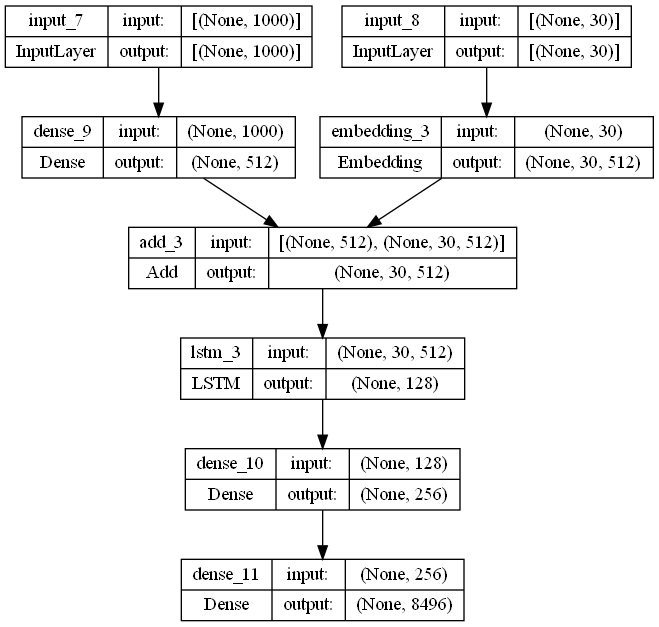

In [137]:
plot_model(model,show_shapes=True)

In [138]:
train_ds = data_genarator(data=train_data,img_features=img_features,tokenizer=tokenizer)

test_ds = data_genarator(data=test,img_features=img_features,tokenizer=tokenizer)

In [139]:
train_ds[0][0][1].shape

(1998, 30)

In [140]:
# train_generator = CustomDataGenerator(df=train_data,
#                                       X_col='image',
#                                       y_col='caption',
#                                       batch_size=32,
#                                       tokenizer=tokenizer,
#                                       vocab_size=vocab_size,
#                                       max_length=30,
#                                       features=img_features)

In [141]:
vocab_size

8496

In [142]:
# train_generator[0][0][0].shape

(1998, 1000)

In [143]:
1998 * 1000

1998000

In [144]:
img_features['1000268201_693b08cb0e.jpg'].shape

(1, 1000)

In [ ]:
model.fit(train_ds,
          epochs=15,
          validation_data=test_ds)

Epoch 1/20
203/203 [==============================] - 40s 176ms/step - loss: 4.9081 - val_loss: 4.1670
Epoch 2/20
203/203 [==============================] - 34s 166ms/step - loss: 3.9464 - val_loss: 3.7417
Epoch 3/20
203/203 [==============================] - 33s 161ms/step - loss: 3.6003 - val_loss: 3.5350
Epoch 4/20
203/203 [==============================] - 32s 155ms/step - loss: 3.3984 - val_loss: 3.4103
Epoch 5/20
203/203 [==============================] - 32s 158ms/step - loss: 3.2561 - val_loss: 3.3249
Epoch 6/20
203/203 [==============================] - 34s 166ms/step - loss: 3.1435 - val_loss: 3.2565
Epoch 7/20
203/203 [==============================] - 35s 170ms/step - loss: 3.0519 - val_loss: 3.2185
Epoch 8/20
203/203 [==============================] - 35s 172ms/step - loss: 2.9731 - val_loss: 3.1798
Epoch 9/20
203/203 [==============================] - 401s 2s/step - loss: 2.9064 - val_loss: 3.1590
Epoch 10/20
203/203 [==============================] - 18453s 91s/step - lo

KeyboardInterrupt: 

In [254]:
model.save('caption_genaration_model.h5')

In [177]:
def index_to_word(word_idx):
    return tokenizer.index_word[word_idx]

In [192]:
def predict_next(img):

    seq_in = 'startseq'

    feature_img = img_features[img]

    for i in range(30):
        seq_in_sequence = tokenizer.texts_to_sequences([seq_in])[0]

        seq_in_padded = pad_sequences([seq_in_sequence], padding='post',maxlen=30)



        y_hat = model.predict([feature_img,seq_in_padded],verbose=False)

        word_index = y_hat.argmax(axis=1)
        predicted_word = index_to_word(word_index[0])

        if predicted_word == 'endseq':
            break
        seq_in = seq_in + ' ' + predicted_word 
    
    return seq_in


In [193]:
predict_next('990890291_afc72be141.jpg')

'startseq a man in a black helmet and a black helmet riding a bike'

In [198]:
# def img_preprocces(img_path): 

#     img = load_img(img_path,
#                      target_size=target_shape)
#     img = img_to_array(img)
#     img = tf.expand_dims(img,axis=0)

#     img = preprocess_input(img)
    

#     feature = vgg_model.predict(img,verbose=False)

#     return feature

In [230]:
resize_img = Resizing(height=224, width=224)

def img_preprocces(img): 

    img = tf.expand_dims(img,axis=0)

    resized_image = resize_img(img)

    img = preprocess_input(resized_image)
    

    feature = vgg_model.predict(img,verbose=False)

    return feature

In [231]:

def genarate_caption(img):

    seq_in = 'startseq'

    feature_img = img_preprocces(img)

    for i in range(30):
        seq_in_sequence = tokenizer.texts_to_sequences([seq_in])[0]

        seq_in_padded = pad_sequences([seq_in_sequence], padding='post',maxlen=30)



        y_hat = model.predict([feature_img,seq_in_padded],verbose=False)

        word_index = y_hat.argmax(axis=1)
        predicted_word = index_to_word(word_index[0])

        
        seq_in = seq_in + ' ' + predicted_word 
        if predicted_word == 'endseq':
            break
    
    return seq_in

In [232]:
predict_next('img.jpg')

UnimplementedError: Exception encountered when calling layer "resizing_2" "                 f"(type Resizing).

{{function_node __wrapped__Cast_device_/job:localhost/replica:0/task:0/device:CPU:0}} Cast string to float is not supported [Op:Cast]

Call arguments received by layer "resizing_2" "                 f"(type Resizing):
  • inputs=tf.Tensor(shape=(1,), dtype=string)

In [234]:
demo = gr.Interface(
    fn=genarate_caption,
    inputs=['image'],
    outputs=['text']
)

In [235]:
demo.launch()

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "c:\Users\VICTUS\anaconda3\envs\GPU\lib\site-packages\uvicorn\protocols\http\httptools_impl.py", line 401, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "c:\Users\VICTUS\anaconda3\envs\GPU\lib\site-packages\uvicorn\middleware\proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
  File "c:\Users\VICTUS\anaconda3\envs\GPU\lib\site-packages\fastapi\applications.py", line 1054, in __call__
    await super().__call__(scope, receive, send)
  File "c:\Users\VICTUS\anaconda3\envs\GPU\lib\site-packages\starlette\applications.py", line 113, in __call__
    await self.middleware_stack(scope, receive, send)
  File "c:\Users\VICTUS\anaconda3\envs\GPU\lib\site-packages\starlette\middleware\errors.py", line 187, in __call__
    raise exc
  File "c:\Users\VICTUS\anaconda3\envs\GPU\lib\site-packages\starlette\middleware\errors.py", line 165, in __call__
 

In [255]:
with open('tokenizer.pkl','wb') as f:
    pkl.dump(tokenizer,f)